## Тема “Обучение без учителя”

### __Задание 1__

In [42]:
# код для подавления предупреждений в процессе выполнения дальнейшего кода
import warnings
warnings.filterwarnings('ignore')

### Импортируйте библиотеки pandas, numpy и matplotlib.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [44]:
# Загружаем данные
df = pd.read_csv('boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


**Описание датасета** - *ДОБАВИТЬ В ИТОГОВЫЙ ПРОЕКТ*

Статистические данные о жилищном рынке Калифорнии, основанные на переписи населения и других источниках, собранных в 1990 году.

* **CRIM** - уровень преступности на душу населения по городским районам
* **ZN** - доля земельных участков, отведенных под жилую застройку, в пределах 25,000 квадратных футов
* **INDUS** - доля акров, отведенных под неразвлекательное промышленное использование
* **CHAS** - наличие речки (Z) — бинарная переменная (0 или 1). Если участок находится рядом с речкой, то значение равно 1; в противном случае — 0
* **NOX** - концентрация оксидов азота (в долях на 10 миллионов)
* **RM** - среднее количество комнат в домах
* **AGE** - доля домов, построенных до 1940 года
* **DIS** - взвешенное расстояние до пяти бостонских центров занятости
* **RAD** - индекс доступа к радиальным магистралям (чем выше значение, тем больше доступность)
* **TAX** - полная ставка налога на имущество (на 10,000 долларов)
* **PTRATIO** - соотношение учеников к учителям по городским районам
* **B** - индекс, который корректируется по формуле: \( B = k(0.63 - 0.001 \cdot \text{lstat})^2 \), где \( k \) — коэффициент, связан с долей афроамериканского населения
* **LSTAT** - доля населения с низким статусом (низкий уровень образования и доля бедных населения)
* **MEDV** - медианная цена на жилье в этом районе (в тысячах долларов)тысячах долларов)ах долларов).йоне (в тысячах долларов).

### Создайте датафреймы X и y из этих данных.

In [46]:
# Определяем целевую переменную y и признаки X
y = df['MEDV']  # целевая переменная
X = df.drop('MEDV', axis=1)  # все остальные столбцы, кроме MEDV

In [47]:
# Проверяем полученные DataFrame
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [48]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

### Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) 

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Масштабируйте данные с помощью StandardScaler.

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
#  для нормализации данных, чтобы улучшить качество работы модели
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Постройте модель TSNE на тренировочных данных с параметрами: n_components=2, learning_rate=250, random_state=42.

In [53]:
from sklearn.manifold import TSNE

In [54]:
# понижаем размерность данных до 2-х компонент для дальнейшей визуализации
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

### Постройте диаграмму рассеяния на этих данных.

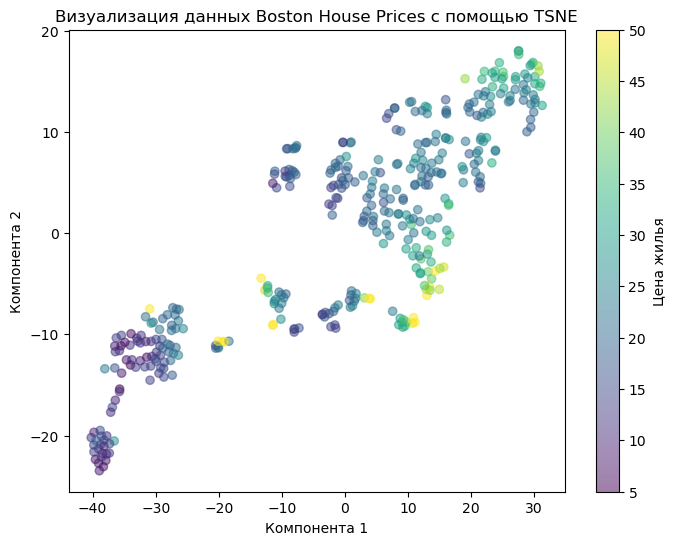

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar(label='Цена жилья')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.title('Визуализация данных Boston House Prices с помощью TSNE')
plt.show()

### __Задание 2__
### С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [56]:
from sklearn.cluster import KMeans

In [57]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42) 
# random_state - для воспроизводимости результатов
clusters = kmeans.fit_predict(X_train_scaled)

### Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

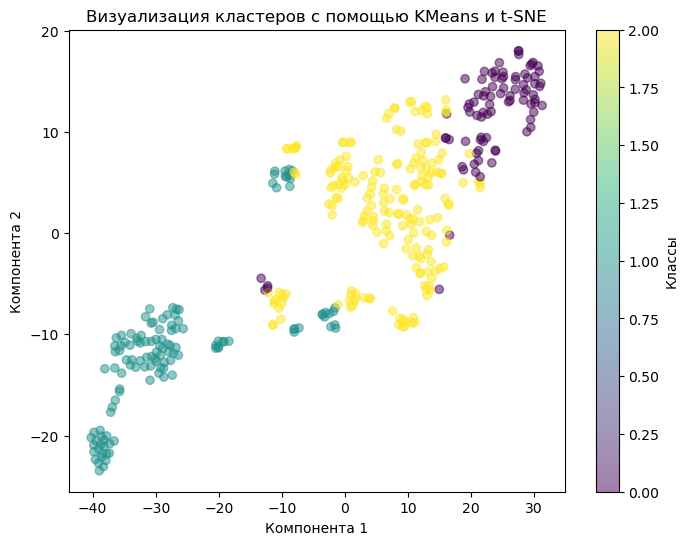

In [58]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.colorbar(label='Классы')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.title('Визуализация кластеров с помощью KMeans и t-SNE')
plt.show()

### Вычислите средние значения price и CRIM в разных кластерах.

In [59]:
# Вычисление средних значений price и CRIM по кластерам
X_train['Cluster'] = clusters
X_train['Price'] = y_train

# Средние значения в разных кластерах
mean_values = X_train.groupby('Cluster')[['Price', 'CRIM']].mean()
print(mean_values)

             Price       CRIM
Cluster                      
0        27.788372   0.073566
1        16.165354  10.797028
2        24.958115   0.421660


### __*Задание 3__
### Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

In [60]:
# Применение модели KMeans к тестовым данным
clusters_test = kmeans.predict(X_test_scaled)

# Добавление информации о кластерах к тестовым данным
X_test['Cluster'] = clusters_test
X_test['Price'] = y_test

### Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

#### здесь используем HouseAge (возраст дома) вместо CRIM

In [61]:
mean_values_test = X_test.groupby('Cluster')[['Price', 'CRIM']].mean()
print(mean_values_test)

             Price       CRIM
Cluster                      
0        31.350000   0.062060
1        16.437143  10.165531
2        21.860784   0.266079
